# One-Dimensional Gaussian Filter

In this notebook, a step function is filtered using a Gaussian filter.

1-D Gaussian filter function:
$$
F(x) = \left(\frac{6}{\pi \Delta^2}\right) ^ {1/2} exp\left({-\frac{6x^2}{\Delta^2}}\right)
$$
Filtered data $\bar{y}$ can be obtained from original $y$:
$$
\bar{y}(x) = \int^{+\infty}_{-\infty} y(x') F(x-x') dx'
$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
# Raw data
x = np.linspace(-1., 1., 101)
y = np.ones_like(x)
y[np.where(x >= 0.0)] = 2.0

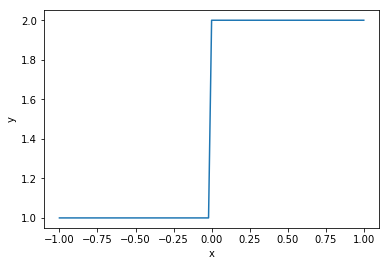

In [3]:
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [4]:
# Gaussian weights
def gauss_weight(x, a, delta):
    gw =  math.sqrt(6./math.pi/delta**2) * \
          math.exp(-6.*(x-a)**2/delta**2)
    return gw

In [5]:
gw = np.zeros_like(x)
x0 = 0.0
delta = 0.5
for i in range(len(x)):
    gw[i] = gauss_weight(x[i], x0, delta)

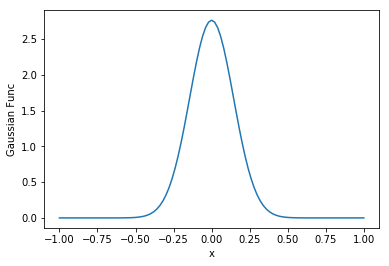

In [6]:
plt.plot(x, gw)
plt.xlabel('x')
plt.ylabel('Gaussian Func')
plt.show()

We can see that $\Delta$ is half of the curve width

**The integral of the entire gauss function is unity.**

In [7]:
s = 0.
for i in range(len(x)-1):
    s = s + gw[i] * (x[i+1] - x[i])
print('Integral of gaussian function:', s)

Integral of gaussian function: 0.999999999995


However, it is not the case if the centre of the curve is shifted.

In [8]:
x0 = 0.8
for i in range(len(x)):
    gw[i] = gauss_weight(x[i], x0, delta)
s = 0.
for i in range(len(x)-1):
    s = s + gw[i] * (x[i+1] - x[i])
print('Integral of gaussian function:', s)

Integral of gaussian function: 0.906149917292


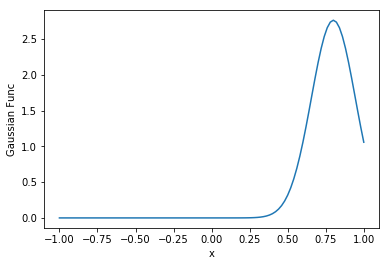

In [9]:
plt.plot(x, gw)
plt.xlabel('x')
plt.ylabel('Gaussian Func')
plt.show()

In [10]:
# Integrate using trapezoidal rule
def gaussian_filter(x, y, delta):
    yf = np.zeros_like(y)
    for i in range(len(x)):
        gw = 0.
        for j in range(len(x)-1):
            gw1 = gauss_weight(x[j], x[i], delta)
            gw2 = gauss_weight(x[j+1], x[i], delta)
            yf[i] = yf[i] + 0.5*(gw1*y[j] + gw2*y[j+1]) * (x[j+1] - x[j])
            gw = gw + 0.5 * (gw1 + gw2) * (x[j+1] - x[j])
    return yf

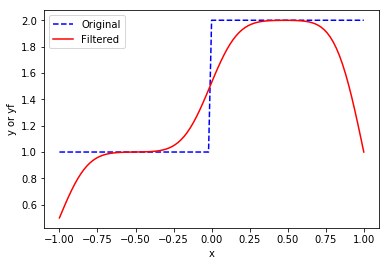

In [11]:
delta = 0.5
yf = np.zeros_like(y)
yf = gaussian_filter(x, y, delta)
plt.plot(x, y, 'b--', label='Original')
plt.plot(x, yf, 'r-', label='Filtered')
plt.xlabel('x')
plt.ylabel('y or yf')
plt.legend(loc='best')
plt.show()

What happened? The filtered curve seems okay in the middle but is off when it is close to the two ends.

**Recall that the gaussian function is not complete (integral is not unity) when approaching the boundaries.**

One solution is to take into account the weights close to boundary.

Another solution is to extend the domain in both directions by at least $\Delta$

In [12]:
# Integrate
def gaussian_filter2(x, y, delta):
    yf = np.zeros_like(y)
    for i in range(len(x)):
        gw = 0.
        for j in range(len(x)-1):
            gw1 = gauss_weight(x[j], x[i], delta)
            gw2 = gauss_weight(x[j+1], x[i], delta)
            yf[i] = yf[i] + 0.5*(gw1*y[j] + gw2*y[j+1]) * (x[j+1] - x[j])
            gw = gw + 0.5 * (gw1 + gw2) * (x[j+1] - x[j])
        yf[i] = yf[i] / gw
    return yf

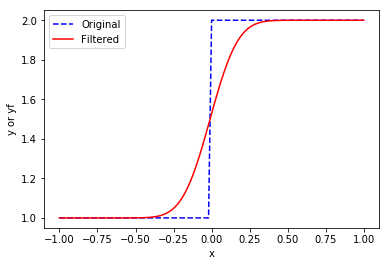

In [13]:
delta = 0.5
yf = np.zeros_like(y)
yf = gaussian_filter2(x, y, delta)
plt.plot(x, y, 'b--', label='Original')
plt.plot(x, yf, 'r-', label='Filtered')
plt.xlabel('x')
plt.ylabel('y or yf')
plt.legend(loc='best')
plt.show()

This is what we want.

Note that the actual filter operation changed to:
$$
\bar{y}(x) = 
\frac{\int^{+\infty}_{-\infty} y(x') F(x-x') dx'}
{\int^{+\infty}_{-\infty} F(x-x') dx'}
$$
where the demomenator is unity unless the point of evaluation is close to the boundary. It is added in order to adjust the weights when the integral of gaussian function is not unity close to boundaries.